In [1]:
#Import module
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
import scipy.optimize as optimization  
import pandas as pd
#Latex font
import matplotlib as mpl
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=16)

In [2]:
ls

2022_Feb_week4_Linear_fit_period.dat
2022_Feb_week4_Linear_fit_period.ipynb
2022_Feb_week4_Linear_fit_period_Sine_fit.py
2022_Feb_week4_Linear_fit_period_lmfit.ipynb
2022_Feb_week4_Linear_fit_period_weighted_data.ipynb
2022_Feb_week4_Mean_calculation_T0_combined.txt
2022_Feb_week4_OC_diagram.jpg
2022_Feb_week4_OC_diagram.out
2022_Feb_week4_new_ephemeris_sin_fit.ipynb
2022_Feb_week4_new_ephemeris_sin_fit.out
2022_Feb_week4_new_ephemeris_sin_fit_lmfit.ipynb
2022_Feb_week4_new_ephemeris_sin_fit_mean_data.ipynb
2022_Feb_week4_new_ephemeris_sin_fit_weight_data.txt
interporate.out


In [3]:
#Read data ---#1
Input = "2022_Feb_week4_Linear_fit_period.dat"
Data   = np.genfromtxt(Input)

#Input calculation ---#1
N = 2450000

Epoch = Data[:,0]
T_obs = Data[:,1]
T_obs_err = Data[:,2]

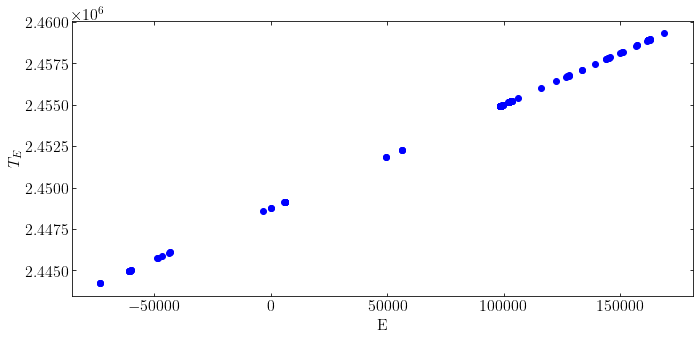

In [4]:
fig, (ax0) = plt.subplots(1, 1, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
#plt.xlim(-0.04,0.04)
#plt.xlabel('Orbital phase')

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
#ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(Epoch, T_obs, yerr= T_obs_err, fmt='o', color='blue',
             ecolor='lightgray', elinewidth=1, capsize=0)


#ax0.legend(loc="best")
ax0.set_xlabel('E')
ax0.set_ylabel('$T_{E}$')

#ax0.set_ylim(-30, 40)

fig.align_ylabels()
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
#plt.savefig("spot_longitude_Beuermann_Kittipong.png")
plt.show()

In [5]:
x = Epoch
y = T_obs
dy = T_obs_err

len_x = len(x)
print(len_x)

123


In [6]:
# Calling the scipy's curve_fit function from optimize module
from scipy.optimize import curve_fit

# Defining a fitting fucntion
def linear_fit(x,m,c):
    return m*x + c

params, covariance = curve_fit(f = linear_fit, xdata = x, ydata = y)

m = params[0]
c = params[1]

dm = covariance[0,0]
dc = covariance[1,1]


print('Slope (m) is ', m)
print('The error of the slope (dm) is ', dm)
print('Intercept (c) is ', c)
print('The error of the intercept (dc) is ', dc)
print(covariance)

Slope (m) is  0.062362845525219396
The error of the slope (dm) is  2.6193240365559364e-19
Intercept (c) is  2448773.2148464173
The error of the intercept (dc) is  2.9564294265740673e-09
[[ 2.61932404e-19 -2.06823093e-14]
 [-2.06823093e-14  2.95642943e-09]]


In [7]:
# define a sequence of inputs between the smallest and largest known inputs
x_min, x_max = np.amin(x), np.amax(x)
x_line = np.linspace(x_min, x_max, len_x)
# calculate the output for the range
y_line = linear_fit(x_line, m, c)

range_x_line = len(x_line)

Res_linear = y - y_line
#print(Res_linear)


print(y)
print(y_line)


#np.savetxt('plot_curve_fit_Linear.txt', np.c_[x, Res_linear,dy])

print(range_x_line)

#Reduced_chisqrt
m = 2
dof = len_x - m
Chi_sqr = ((y - y_line)**2/(dy)**2)/dof
Reduced_chisq = sum(Chi_sqr)
print(Reduced_chisq)

[2444214.55325 2444214.61562 2444214.67798 2444968.02309 2444968.95712
 2444969.01962 2444978.99755 2444993.90078 2444993.96328 2444994.02642
 2445020.90513 2445021.90292 2445024.83386 2445731.9664  2445763.83373
 2445854.8828  2446054.94231 2446086.93565 2446086.99796 2448560.5578
 2448773.21509 2448774.21293 2449137.91294 2449143.96214 2449144.02438
 2449144.08689 2449144.96005 2449145.02235 2449145.08454 2449145.14711
 2451870.77688 2451870.90163 2452284.679   2452284.67895 2452284.74136
 2454914.83228 2454914.89466 2454916.82793 2454919.6966  2454920.75678
 2454922.62767 2454922.69002 2454922.75237 2454922.81473 2454937.78183
 2454937.8442  2454938.71729 2454938.77961 2454940.65051 2454940.71287
 2454940.77524 2454940.83764 2454941.77305 2454941.83541 2454942.64612
 2454942.77085 2454942.83322 2454942.89559 2454943.7063  2454943.76865
 2454943.83101 2454970.64703 2454970.70941 2454993.65893 2454998.64798
 2455005.6326  2455135.97098 2455156.9249  2455156.98724 2455157.92271
 245515

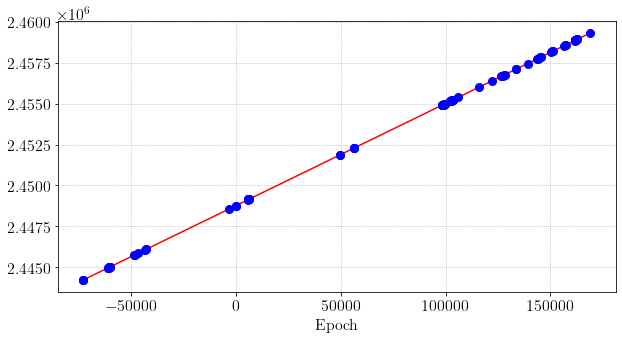

In [8]:
#Plotgraph
fig=plt.figure(figsize=(10, 5))
plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
# create a line plot for the mapping function
plt.plot(x_line, y_line, '-', color='red')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('Epoch')
ax0.set_ylabel('$T_{E}$')
plt.grid(linestyle='dotted')
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.show()